<a href="https://colab.research.google.com/github/YuliiaMan/python_for_ds_tasks/blob/main/Additional_hw_6_Pandas_%2B_Viz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Усі імпорти рекомендую розташувати отут зверху для зручності.

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

1.Завантажте дані у pandas dataframe з файла `ecommerce_data.csv`. Обовʼязково при завантаженні вкажіть параметр `encoding = 'ISO-8859-1'`, без нього буде помилка.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data_path = '/content/drive/MyDrive/datastat/ecommerce_data_1.csv'
df = pd.read_csv(data_path, encoding = 'ISO-8859-1')

2.Виведіть перші три записи в завантаженому наборі даних

In [38]:
df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom


3.Перейменуйте колонки, для цього просто запустіть код нижче та зверніть увагу, як ми перейменували колонки. Перейменування тут - просто для зручності.

Це завдання пропустила, адже код нижче не було вказано

4.Виведіть поточні назви колонок.

In [5]:
df.dtypes

,0
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,object
UnitPrice,float64
CustomerID,float64
Country,object


# Базове розуміння даних

5.Виведіть кількість колонок і стовпців в наборі даних.

In [6]:
df.shape

(541909, 8)

6.Виведіть типи даних в кожній з колонок. Будь-яким способом, але аби для Вас як для дослідника стало зрозуміло, з якими даними ми зараз маємо справу.

In [7]:
df.dtypes

,0
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,object
UnitPrice,float64
CustomerID,float64
Country,object


Очікуваний результат (один з):

![](https://drive.google.com/uc?export=view&id=1Pc2cam8vdZeEP4xLXlsoevOTt4O_KI4R)

7.Виведіть кількість пустих (null) значень в кожній з колонок за спаданням цієї кількості.

In [8]:
df.isna().sum().sort_values(ascending=False)

,0
CustomerID,135080
Description,1454
InvoiceNo,0
StockCode,0
Quantity,0
InvoiceDate,0
UnitPrice,0
Country,0


Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1IXVowBSH9-LtCR8gkMXcQHXWPinujkF5)

### Конвертація дат

8.Конвертуйте дату колонки `invoicedate` у тип `datetime64[ns]`.

In [9]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

print(df['InvoiceDate'].dtypes)

datetime64[ns]


Запустіть код нижче:

In [10]:
df.InvoiceDate[:2]

,InvoiceDate
0,2010-12-01 08:26:00
1,2010-12-01 08:26:00


Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1ds5CwdM5D50hlnk1zsDw7YT-aG_KErIg)

# Чистка даних

### Прибираємо пусті значення (NA)

9.Приберіть усі пусті значення з набору даних `df` і запишіть результат у нову змінну `df_new`.

In [11]:
df_new = df.dropna()



10.Виведіть кількість колонок і рядків в `df_new`.

In [12]:
df_new.shape

(406829, 8)

11.Виведіть, який відсоток (від 0 до 100%) рядків ми видалили з `df`, коли прибрали пусті значення? Округліть результат до цілих відсотків.

In [13]:
initial_rows = len(df)
new_rows = len(df_new)

percent_deleted = ((initial_rows - new_rows) / initial_rows) * 100

percent_deleted = round(percent_deleted)

print(f"Відсоток видалених рядків: {percent_deleted}%")

Відсоток видалених рядків: 25%


Очікуваний результат: `25%`

### Приберемо негативні значення `quantity`

12.Виведіть мінімальне, максимальне і середнє значення колонки `quantity`. Найкраще згадати, як це зробити одною командою, що дозволяє "описати" колонки в датафреймі :)

In [14]:
stats = df_new['Quantity'].describe()

min_value = stats['min']
max_value = stats['max']
mean_value = stats['mean']

print(f"Мax: {min_value}")
print(f"Мin: {max_value}")
print(f"Mean: {mean_value}")

Мax: -80995.0
Мin: 80995.0
Mean: 12.06130339774205


13.Скажімо, нас не цікавлять записи з негативними quantity (бо це поверненння).   
Приберіть всі рядки, де `quantity` менше 0 з набора даних `df_new` і запишіть в той самий набір даних `df_new`.

In [15]:
df_new = df_new[df_new['Quantity'] >= 0]

print("Мінімальне значення quantity після фільтрації:", df_new['Quantity'].min())

Мінімальне значення quantity після фільтрації: 1


# Обробка даних

### Зміна типу даних `custid`

14.Ідентифікатор клієнта має мати тип "рядок" для простоти роботи з цією колонкою. Бо інакше пандас буде інтерпретувати цю колонку як число - а це логічно не правильно.
Перетворіть тип даних колонки `custid`  спочатку на int, а потім на рядок. Або можете зробити ці перетворення в одній функції (лямбді).

In [16]:
df_new['CustomerID'] = df_new['CustomerID'].astype(int)

In [17]:
df_new['CustomerID'] = df_new['CustomerID'].astype(str)
print(df_new['CustomerID'].dtype)

object


Або за допомогою однієї функції (лямбди)

In [18]:
df_new['CustomerID'] = df_new['CustomerID'].apply(lambda x: str(int(x)))
print(df_new['CustomerID'].dtype)

object


Запустіть код нижче:

In [34]:
df_new['CustomerID'][:3]

,CustomerID
0,17850
1,17850
2,17850


Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1V5Mn0OC6hD-OmXGswe2N8CsIxsuBuoPE)

### Додамо колонку `amountspent`

15.Додайте в `df_new` колонку `amountspent`, яка є добутком колонок `quantity` і `unitprice`.

In [19]:
df_new['amountspent'] = df_new['Quantity'] * df_new['UnitPrice']

print(df_new[['Quantity', 'UnitPrice', 'amountspent']].head())

   Quantity  UnitPrice  amountspent
0         6       2.55        15.30
1         6       3.39        20.34
2         8       2.75        22.00
3         6       3.39        20.34
4         6       3.39        20.34


### Додавання колонок `month`, `day`, `hour`, `yearmonth` для інвойса.

16.Використовуючи колонку invoicedate та те, що вона в нас вже має тип datetime, створіть 4 нових колонки в даних:
- `yearmonth` - рік і місяць інвойсу разом у форматі "2010-12" - тобто 12 місяць 2010го року і тип цієї колонки має бути датою (підказка: просто робимо для колонки`invoicedate` `dt.to_period('M')` для того аби таке отримати)
- `month` - місяць інвойсу
- `day` - день тижня інвойсу (понеділок - це перший, неділя - останній)
- `hour` - година інвойсу

Зробіть також так, аби `yearmonth` була третьою (за рахунком) колонкою в датафреймі, `month` - четвертою, `day` - пʼятою, `hour` - шостою.

In [20]:
df_new['yearmonth'] = df_new['InvoiceDate'].dt.to_period('M')
df_new['month'] = df_new['InvoiceDate'].dt.month
df_new['day'] = df_new['InvoiceDate'].dt.dayofweek + 1
df_new['hour'] = df_new['InvoiceDate'].dt.hour

new_column_order = (
    list(df_new.columns[:2]) +
    ['yearmonth', 'month', 'day', 'hour'] +
    list(df_new.columns[2:-4])
)
df_new = df_new[new_column_order]

Запустіть код нижче:

In [21]:
df_new.head(3)

,InvoiceNo,StockCode,yearmonth,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amountspent
0,536365,85123A,2010-12,12,3,8,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,2010-12,12,3,8,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,2010-12,12,3,8,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00


In [22]:
df_new.dtypes

,0
InvoiceNo,object
StockCode,object
yearmonth,period[M]
month,int32
day,int32
hour,int32
Description,object
Quantity,int64
InvoiceDate,datetime64[ns]
UnitPrice,float64


Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1Wn4tNmFOvqHk0VLpfwASKWiPpjJ5_Jgt)

![](https://drive.google.com/uc?export=view&id=1fYm7_uYhk14J51YkqJLtsQo_aqxz6jGZ)

# Базовий Exploratory Data Analysis (EDA)

17.Побудуйте з допомогою методів візуалізації `pandas` датафрейму (ті що з категорії `df.plot()`) стовпчастий графік кількості унікальних продажів помісячно за весь наявний період в даних. Зробіть так, аби підписи дат були нахилені під кутом 45 градусів для зручнішого перегляду.
Кількість унікальних продажів - це кількість унікальних інвойсів.

Підказка: для візуалізації нам спочатку треба агреугувати дані помісячно.

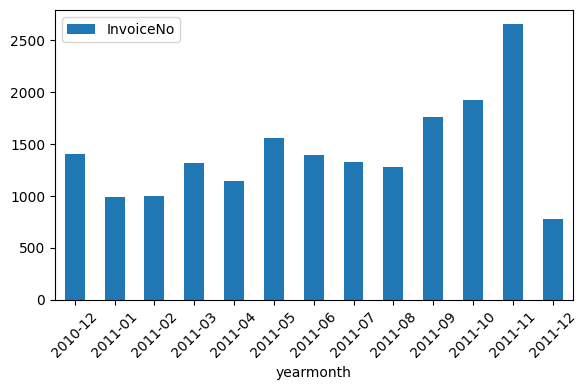

In [27]:
monthly_sales = df_new.groupby('yearmonth')['InvoiceNo'].nunique()

ax = monthly_sales.plot(kind='bar', figsize=(6, 4))

ax.set_xlabel('yearmonth')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1xbjqTCroVKLgdRxFGA9LG1T6Xx9eWlO1)

18.Побудуйте стовпчастий графік кількості унікальних інвойсів для топ 10 клієнтів за цим показником.

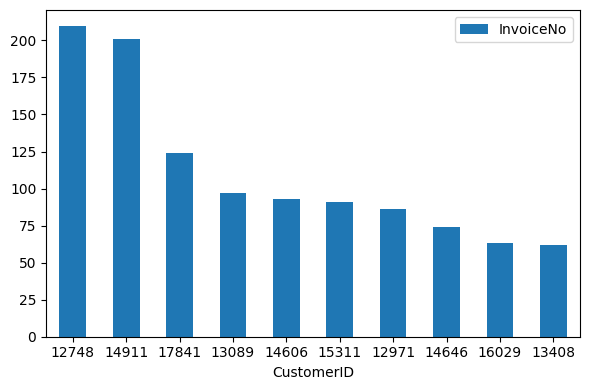

In [29]:
customer_invoices = df_new.groupby('CustomerID')['InvoiceNo'].nunique()

top_10_customers = customer_invoices.sort_values(ascending=False).head(10)

ax = top_10_customers.plot(kind='bar', figsize=(6, 4))

ax.set_xlabel('CustomerID')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.legend()
plt.tight_layout()
plt.show()

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1zGhcVaPZBqcKj8YG_P-0pOzGVAV8cJNr)

19.Створіть новий датафрейм, що містить сумарний `amountspent` по кожному ідентифікатору клієнта.

In [30]:
customer_spent = df_new.groupby('CustomerID')['amountspent'].sum().reset_index()

customer_spent.columns = ['CustomerID', 'TotalAmountSpent']

print(customer_spent.head())

  CustomerID  TotalAmountSpent
0      12346          77183.60
1      12347           4310.00
2      12348           1797.24
3      12349           1757.55
4      12350            334.40


20.Використовуючи датафрейм з попереднього пункту, виведіть, якими є 10, 25, 50, 75 і 90 персентилі сумарних витрат клієнтів за розглянутий період:

In [31]:
percentiles = [10, 25, 50, 75, 90]
percentile_values = customer_spent['TotalAmountSpent'].quantile([p / 100 for p in percentiles])

for p, value in zip(percentiles, percentile_values):
    print(f"{p}th percentile: {value:.2f}")

10th percentile: 156.57
25th percentile: 307.25
50th percentile: 674.45
75th percentile: 1661.64
90th percentile: 3646.16


Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=16h2lsEwR3GooNkzH0JLfJHRk5oyG3ZqE)

21.Скільки унікальних клієнтів мають сумарні витрати вищі, ніж 90-тий персентиль в попередньому завдані?

In [32]:
p90 = customer_spent['TotalAmountSpent'].quantile(0.9)

customers_above_p90 = customer_spent[customer_spent['TotalAmountSpent'] > p90]

num_customers_above_p90 = customers_above_p90.shape[0]

print(f"Кількість клієнтів із витратами більше ніж 90-й персентиль: {num_customers_above_p90}")

Кількість клієнтів із витратами більше ніж 90-й персентиль: 434


22.Виведіть середню суму покупок в мережі по дням тижня. Дні тижня мають йти в звичному порядку Monday, Tuesday і т.д.

In [33]:
avg_spent_by_day = (
    df_new.groupby('day')['amountspent']
    .mean()
    .reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
)

print(avg_spent_by_day)

day
Monday      NaN
Tuesday     NaN
Wednesday   NaN
Thursday    NaN
Friday      NaN
Saturday    NaN
Sunday      NaN
Name: amountspent, dtype: float64


## Дослідимо продажі на суму 0 умовних одиниць

23.Можна було помітити вище, що в нас є продажі на суму 0. Дослідимо їх. Створіть новий датафрейм з тільки такими продажами.

In [34]:
df_zero_sales = df_new[df_new['amountspent'] == 0]

print(f"Кількість продажів із сумою 0: {df_zero_sales.shape[0]}")
print(df_zero_sales.head())

Кількість продажів із сумою 0: 40
      InvoiceNo StockCode yearmonth  month  day  hour  \
9302     537197     22841   2010-12     12    7    14   
33576    539263     22580   2010-12     12    4    14   
40089    539722     22423   2010-12     12    2    13   
47068    540372     22090   2011-01      1    4    16   
47070    540372     22553   2011-01      1    4    16   

                        Description  Quantity         InvoiceDate  UnitPrice  \
9302   ROUND CAKE TIN VINTAGE GREEN         1 2010-12-05 14:02:00        0.0   
33576  ADVENT CALENDAR GINGHAM SACK         4 2010-12-16 14:36:00        0.0   
40089      REGENCY CAKESTAND 3 TIER        10 2010-12-21 13:45:00        0.0   
47068       PAPER BUNTING RETROSPOT        24 2011-01-06 16:41:00        0.0   
47070        PLASTERS IN TIN SKULLS        24 2011-01-06 16:41:00        0.0   

      CustomerID         Country  amountspent  
9302       12647         Germany          0.0  
33576      16560  United Kingdom          0.0 

### Динаміка продажів на суму 0

24.Зобразіть у вигляді стовпчастої діаграми помісячну динаміку продажів на суму 0.

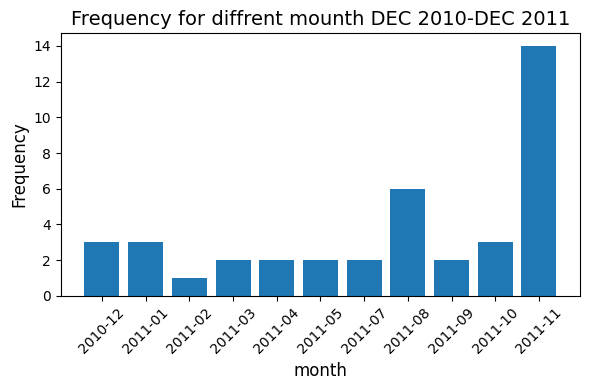

In [37]:
zero_sales_monthly = (
    df_zero_sales.groupby('yearmonth')
    .size()
    .reset_index(name='zero_sales_count')
)

plt.figure(figsize=(6, 4))
plt.bar(zero_sales_monthly['yearmonth'].astype(str), zero_sales_monthly['zero_sales_count'])
plt.xlabel('month', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Frequency for diffrent mounth DEC 2010-DEC 2011', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1RfpdWGqkOmwZ6RVUqQz-U-q3qkml5g88)

25.Згрупуйте дані за країнами та підрахуйте кількість унікальних інвойсів з сумою 0 для кожної країни. Виведіть у вигляді датафрейму.

In [39]:
zero_invoices_by_country = (
    df_zero_sales.groupby('Country')['InvoiceNo']
    .nunique()
    .reset_index(name='unique_zero_invoices_count')
    .sort_values(by='unique_zero_invoices_count', ascending=False)
)

print(zero_invoices_by_country)

          Country  unique_zero_invoices_count
9  United Kingdom                          21
0       Australia                           3
1            EIRE                           2
3         Germany                           2
2          France                           1
4     Netherlands                           1
5          Norway                           1
6             RSA                           1
7           Spain                           1
8     Switzerland                           1


Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1N9rcWby_Umc31Q7e-1p2bCb1nCpzadoz)

Велике питання, чого магазин так багато порівняно роздавав безкоштовних товарів в UK, але така політика фірми :)

Якщо у вас ще є натхнення, пропоную задати до цих даних ще 3 своїх питання.